# Install Libraries

In [ ]:
!pip install pandas
!pip install scikit-learn
!pip install numpy

# Run this Cell to Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Main Code

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import re


# Reading the data
data = pd.read_csv("/content/drive/MyDrive/Spam_Detection/spam.csv",encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
#cleaning data

data = data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
data = data.rename(columns={'v1':'label','v2':'Text'})
data['label_enc'] = data['label'].map({'ham':0,'spam':1})

data.head()

,label,Text,label_enc
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:
# Convert text to lowercase
data['Text'] = data['Text'].str.lower()

# Remove special characters and digits
data['Text'] = data['Text'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))

data.head()

,label,Text,label_enc
0,ham,go until jurong point crazy available only in ...,0
1,ham,ok lar joking wif u oni,0
2,spam,free entry in 2 a wkly comp to win fa cup fina...,1
3,ham,u dun say so early hor u c already then say,0
4,ham,nah i dont think he goes to usf he lives aroun...,0


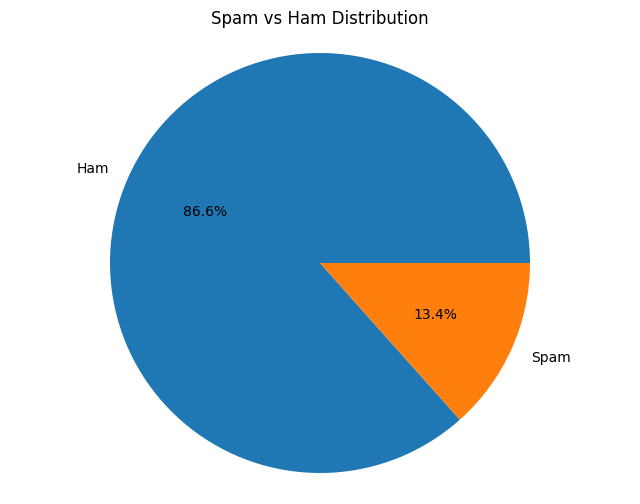

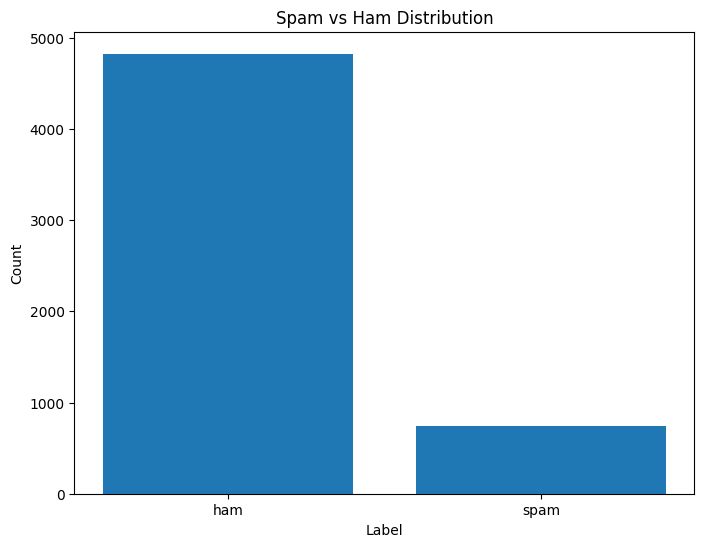

label
ham     4825
spam     747
Name: count, dtype: int64


In [ ]:
# Count the occurrences of each label
label_counts = data['label'].value_counts()

# Create the pie chart
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(label_counts, labels=['Ham', 'Spam'], autopct='%1.1f%%')
ax.axis('equal')
plt.title('Spam vs Ham Distribution')
plt.show()

# Create the bar
plt.figure(figsize=(8, 6))
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Spam vs Ham Distribution')
plt.show()

In [ ]:
# Finding Total no of unique words in corpus
s = set()
for sent in data['Text']:
  for word in sent.split():
    s.add(word)
total_words_length=len(s)
print("Total Number of Unique Words in Dataset: " + str(total_words_length)) # Tells about the Vocabulary  richness of the dataset

# Find average number of tokens/text in all sentences
avg_words_len=round(sum([len(i.split()) for i in data['Text']])/len(data['Text']))
print("Average Length Of Words: " + str(avg_words_len)) # tells if sentences are descriptive or concise

Total Number of Unique Words in Dataset: 9477
Average Length Of Words: 15


In [ ]:
# Splitting data for Training and testing
X, y = np.asanyarray(data['Text']), np.asanyarray(data['label_enc'])
new_data = pd.DataFrame({'Text': X, 'label': y})
X_train, X_test, y_train, y_test = train_test_split(
	new_data['Text'], new_data['label'], test_size=0.2, random_state=42) # 20% for testing and 80% for training
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((4457,), (4457,), (1115,), (1115,))

In [ ]:
# Convert text data to numerical feature vectors
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train the SVM model
svm_model = SVC()
svm_model.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test_vectorized)

# Evaluate the model's performance
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

NameError: name 'CountVectorizer' is not defined

In [ ]:
# Function to predict whether a message is spam or not
def predict_spam(message):
    # Convert the message to a numerical feature vector
    message_vectorized = vectorizer.transform([message])

    # Make a prediction using the trained SVM model
    prediction = svm_model.predict(message_vectorized)

    # Return the prediction
    return 'Spam' if prediction[0] == 1 else 'Not Spam'

# Continuously prompt the user for input and make predictions
while True:
    user_input = input("Enter a message (or 'q' to quit): ")
    if user_input.lower() == 'q':
        break
    prediction = predict_spam(user_input)
    print(f"The message is predicted as: {prediction}")